# Saving the Notebook personal account
This notebook is currently created by me and thus any changes made by me will affect others looking at it too. To avoid this, save the notebook to your account by following these steps:

1. Click `Ctrl + S` in Windows or `command + S` in Mac
2. You'll be prompted with a message, click on `SAVE A COPY IN DRIVE` button.
3. If you're not logged in with any google account, you'll be asked to login first. If already logged in, move to next step.
4. After you're logged in, again click `Ctrl + S`, you'll again be prompted with the same message. Click on `SAVE A COPY IN DRIVE` button
5. In a second another window will open with file name `Copy of Semantic-Representation.ipynb`
6. Now this `Copy of Semantic-Representation.ipynb` file is saved in your google drive and you can make changes in it.

To access this file any other time, go to your Google Drive of same Google account, navigate or search the folder `Colab Notebooks`. There you'll see the file `Copy of Semantic-Representation.ipynb`. To open it in Colab, do the following:

* Right click on the file.
* Under `Open With` section, click `Google Colaboratory`

# Running Instructions

* From the menu on top, click **Runtime**
* Then click **Change runtime type**
* Under **Hardware Accelarator**, select **GPU**
* Click **Save**

Now, start the experiments!

**Note**: For interested students, here's the link to the [GitHub Repo](https://github.com/ashishu007/Word-Embeddings)



# Part A - Word Embeddings




# Introduction

Word Embeddings are used to represent words in a multi-dimensional vector form. A word <span class="math"><b>w<sub>i</sub></b></span> in vocabulary **V** is represented in the form of a vector of **n** dimensions. These vectors are generated by unsupervised training on a large corpus of words to gain the semantic similarities between them. 

## Downloading the required vector file



In [3]:
import sys

In [4]:
# Make a directory to store the vector files
!mkdir vectors

# Download the different files using these commands. This may take a while

!cd vectors && curl -O http://magnitude.plasticity.ai/word2vec/light/GoogleNews-vectors-negative300.magnitude
# !cd vectors && curl -O http://magnitude.plasticity.ai/glove/light/glove.6B.50d.magnitude
!cd vectors && curl -O http://magnitude.plasticity.ai/elmo/light/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4016M  100 4016M    0     0  60.1M      0  0:01:06  0:01:06 --:--:-- 44.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51.9M  100 51.9M    0     0  60.5M      0 --:--:-- --:--:-- --:--:-- 60.4M


In [5]:
# Check what files were dowloaded

!ls
!cd vectors && ls

sample_data  vectors
elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude
GoogleNews-vectors-negative300.magnitude


In [6]:
# Install the required libraries. Again this may take a while

!pip3 install torch numpy scikit-learn pandas seaborn matplotlib transformers datasets sentence_transformers

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 290 kB 46.2 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 37.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 3.3 MB 35.1 MB/s 
     |████████████████████████████████| 895 kB 47.6 MB/s 
     |████████████████████████████████| 125 kB 50.0 MB/s 
     |████████████████████████████████| 1.3 MB 45.1 MB/s 
     |████████████████████████████████| 243 kB 47.5 MB/s 
     |████████████████████████████████| 1.2 MB 47.2 MB/s 
     |████████████████████████████████| 271 kB 41.1 MB/s 
     |████████████████████████████████| 160 kB 40.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=289170905747594163b05dd9c7e4b32d98be1f82f4e0e682ede74f116f4cdaaa
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da7009

In [7]:
import torch
torch.__version__

'1.9.0+cu111'

In [8]:
# Since pymagnitude can not installed properly with pip (pypi), we'll use another method for it

# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."


Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    895      0 --:--:-- --:--:-- --:--:--   895
Done installing Magnitude.


## Import some libraries

In [9]:
# Import some libraries

import pymagnitude as pym
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [10]:
# Let's define some utility functions
def similarity_between_docs(doc1, doc2, is_1d=False):
    if is_1d:
        v1 = np.reshape(doc1, (1, -1))
        v2 = np.reshape(doc2, (1, -1))
    else:
        d1 = np.mean(doc1, axis=0)
        d2 = np.mean(doc2, axis=0)
        v1 = np.reshape(d1, (1, -1))
        v2 = np.reshape(d2, (1, -1))
    return cosine_similarity(v1, v2)[0][0]

def plot_1d_heatmap(vec, name):
    v = vec.reshape(1, -1)
    plt.figure(figsize=(20, 2))
    sns.heatmap(v, cmap="YlGnBu").set_title(name)
    plt.rcParams.update({"font.size": 22})
    plt.show()
    return 

# Static Word Embeddings
Static WEs have fixed vector value for each word. They loose the contextual information

1. Google's Word2Vec
2. Stanford's GloVe
3. Facebook's fastText

## Google's Word2Vec

In [11]:
# Load the pre-trained Word2Vec vectors

# glove_vectors = pym.Magnitude("./vectors/glove.6B.50d.magnitude")
w2v_vectors = pym.Magnitude("./vectors/GoogleNews-vectors-negative300.magnitude")

For using other vectors, download the pre-trained vectors from `pymagnitude` [repo](https://github.com/plasticityai/magnitude#pre-converted-magnitude-formats-of-popular-embeddings-models) and put them in `./vectors` folder

In [12]:
# Print some info

print("Vector Name: {}\nTotal words: {}\nDimension of each word: {}".
              format("Word2Vec", len(w2v_vectors), w2v_vectors.dim))

Vector Name: Word2Vec
Total words: 3000000
Dimension of each word: 300


In [13]:
# Take some word from the pre-trained vectors

for i, (key, vec) in enumerate(w2v_vectors):
    if i == 1000:
        print("Index = {}\Word: {}\nVector Size: {}\nVector: {}".format(i, key, vec.shape, vec))
        break

Index = 1000\Word: Paul
Vector Size: (300,)
Vector: [ 1.211609e-01  4.324040e-02 -5.569700e-03  8.384690e-02  2.085200e-02
 -1.558410e-02 -4.038700e-02 -9.965050e-02 -3.380210e-02 -2.205920e-02
 -5.531260e-02 -2.688810e-02  7.155520e-02  8.340790e-02  7.133600e-03
  3.533860e-02  1.167710e-01  4.324040e-02  7.901800e-02  8.296890e-02
 -4.411840e-02  1.525490e-02  8.472480e-02 -6.277540e-02  3.923500e-03
 -1.234660e-02  3.402160e-02  6.101940e-02  1.942530e-02  2.151050e-02
 -4.828880e-02  2.030320e-02  3.292420e-02 -5.882450e-02  6.453130e-02
 -2.611980e-02  6.063500e-03  1.439883e-01 -3.731400e-02  1.064550e-02
  1.251120e-02 -2.074220e-02 -1.679130e-02 -7.243310e-02 -7.199420e-02
 -2.359560e-02  1.920580e-02 -2.677830e-02  5.443460e-02  3.468010e-02
  2.370540e-02 -5.679400e-03 -2.238840e-02 -9.526060e-02 -8.724900e-03
  5.202020e-02  2.963170e-02 -9.877250e-02  3.380210e-02 -5.487360e-02
  6.233640e-02 -1.190760e-02 -9.306560e-02 -4.192340e-02 -8.296890e-02
 -8.428580e-02 -2.513210e

In [14]:
# Get the vector for some word
print(w2v_vectors.query("dog"))

# Get the vector using the index
print(w2v_vectors[1000])

[ 1.719810e-02 -7.493400e-03 -5.798200e-02  5.405100e-02 -2.833580e-02
  1.924540e-02  1.965490e-02 -2.768070e-02 -5.159400e-03 -2.129280e-02
  6.027510e-02 -1.421706e-01 -7.575300e-03 -5.568890e-02 -8.435200e-03
  3.603400e-02 -6.682670e-02  5.339590e-02 -6.289580e-02 -4.029260e-02
  5.208550e-02 -3.324960e-02  4.782700e-02 -5.503380e-02 -2.997380e-02
  6.715430e-02 -5.012010e-02  1.074469e-01  1.100676e-01  8.189600e-03
 -3.259440e-02 -2.751690e-02 -1.220240e-02 -2.882720e-02 -3.308580e-02
  2.610400e-03 -4.504300e-03  1.768940e-02  4.979250e-02  1.120331e-01
  5.568900e-03 -7.141290e-02 -5.057000e-03  1.760750e-02 -3.603400e-02
 -2.981000e-02  8.353340e-02 -2.358590e-02 -5.364200e-03  2.538760e-02
 -2.358590e-02  3.996500e-02  7.698180e-02  4.749900e-03  3.865470e-02
  2.518300e-03  9.237810e-02 -8.189550e-02  9.958490e-02  1.171110e-02
  8.124030e-02  4.553390e-02  4.782700e-02  5.896500e-03  9.827500e-03
 -4.078400e-02  7.657200e-03 -1.596960e-02 -5.208550e-02  1.054400e-03
  1.15

In [15]:
# Get the vectors for multiple words (or a document)

doc_vecs = w2v_vectors.query(["I", "read", "a", "book"])
doc_vecs.shape

(4, 300)

In [16]:
# Get the vectors for multiple documents

mul_doc_vecs = w2v_vectors.query([["I", "read", "a", "book"], ["I", "read", "a", "sports", "magazine"]])
mul_doc_vecs.shape

(2, 5, 300)

In [17]:
# Get the similarity between two words or documents

print("Similarity between \"Apple\" and \"Mango\": {}".
          format(w2v_vectors.similarity("apple", "mango")))

print("Similarity between \"Apple\" and [\"Mango\", \"Orange\"]: {}".
          format(w2v_vectors.similarity("apple", ["mango", "orange"])))

print("Most similar to \"Cat\" from [\"Dog\", \"Television\", \"Laptop\"]: {}".
          format(w2v_vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])))

Similarity between "Apple" and "Mango": 0.5751857161521912
Similarity between "Apple" and ["Mango", "Orange"]: [0.5751857, 0.39203462]
Most similar to "Cat" from ["Dog", "Television", "Laptop"]: dog


In [18]:
# Similarity between two documents

doc1 = w2v_vectors.query(["I", "read", "a", "book"]) 
doc2 = w2v_vectors.query(["I", "read", "a", "sports", "magazine"])
print("Similarity between\n\"I read a book\" and \"I read a sports magazine\": {}".
              format(similarity_between_docs(doc1, doc2, is_1d=False)))

Similarity between
"I read a book" and "I read a sports magazine": 0.8234725594520569


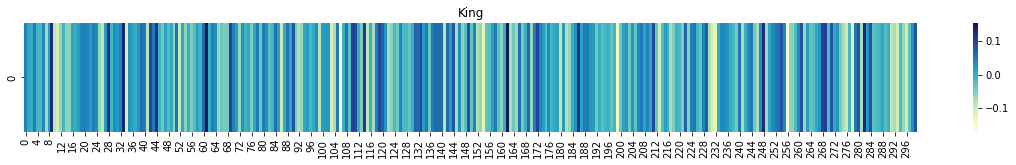

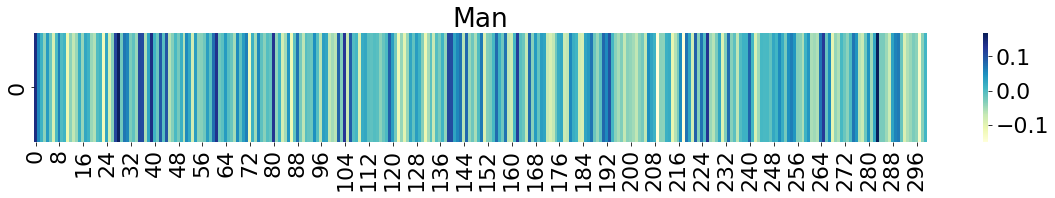

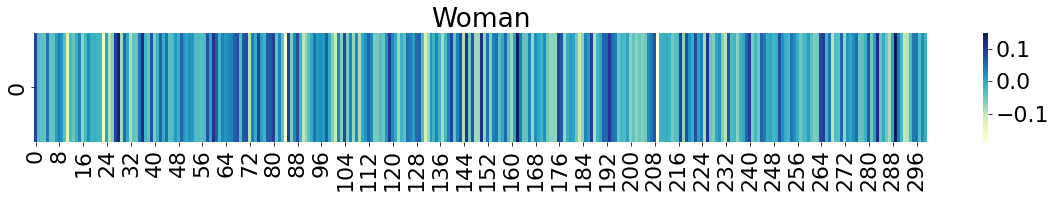

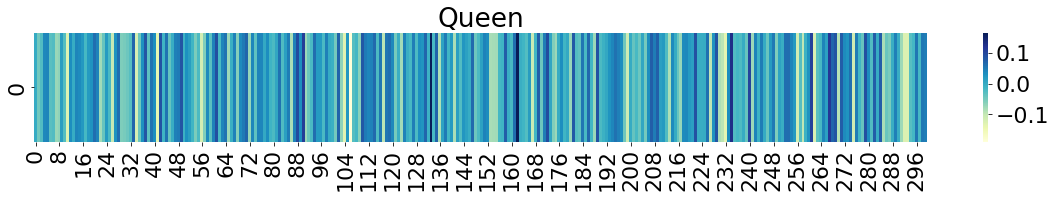

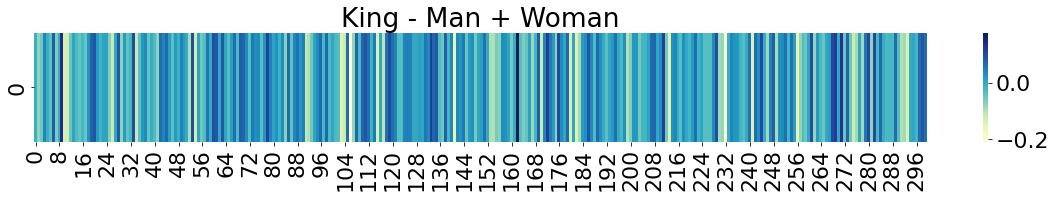

Similarity between
"King - Man + Woman" and "Queen": 0.7118194103240967


In [19]:
# Plot some vectors using heatmap

plot_1d_heatmap(w2v_vectors.query("king"), "King")
plot_1d_heatmap(w2v_vectors.query("man"), "Man")
plot_1d_heatmap(w2v_vectors.query("woman"), "Woman")
plot_1d_heatmap(w2v_vectors.query("queen"), "Queen")
tmp = w2v_vectors.query("king") - w2v_vectors.query("man") + w2v_vectors.query("woman")
plot_1d_heatmap(tmp, "King - Man + Woman")

print("Similarity between\n\"King - Man + Woman\" and \"Queen\": {}".
      format(similarity_between_docs(tmp, w2v_vectors.query("queen"), is_1d=True)))

### Exercises

It's time for you to explore these functionalities.

Try some to write code for some of the queries below. Or head on to this GitHub repository to have a look at different examples:

[https://github.com/plasticityai/magnitude#querying](https://github.com/plasticityai/magnitude#querying)

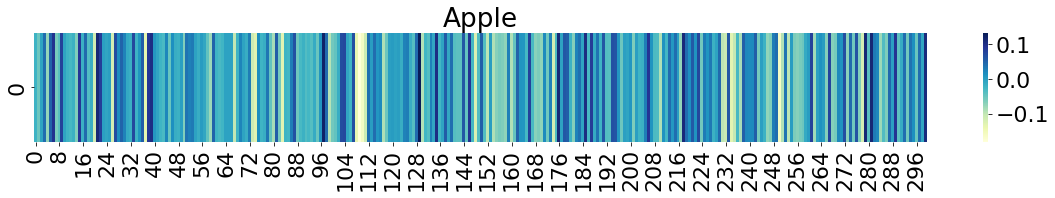

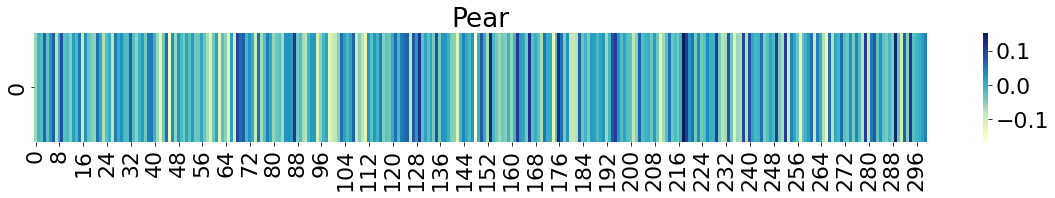

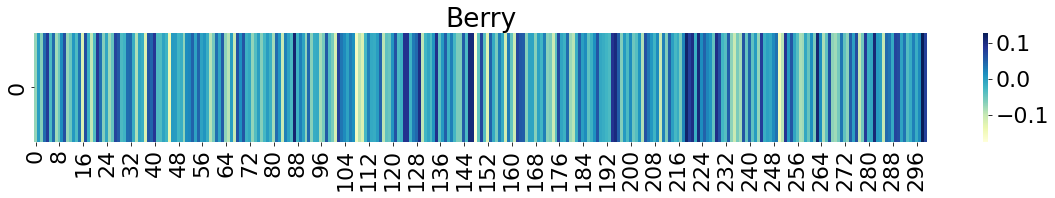

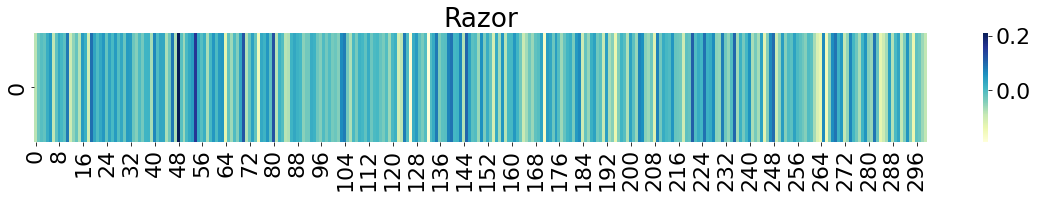

In [20]:
"""
Try plotting heatmap for four different words, out of which three should have 
same property and should be different. For example, "girl", "boy", "man", "water
"""

# Your code here
plot_1d_heatmap(w2v_vectors.query("apple"), "Apple")
plot_1d_heatmap(w2v_vectors.query("pear"), "Pear")
plot_1d_heatmap(w2v_vectors.query("berry"), "Berry")
plot_1d_heatmap(w2v_vectors.query("Razor"), "Razor")



In [21]:
"""
Calculate the similarity between two words with similar sense and two with no 
similarity. For example, similarity between "cat" & "dog" and similarity between 
"apple" and "lion"
"""

# Your code here
word1 = w2v_vectors.query(["dog"]) 
word2 = w2v_vectors.query(["cat"])
similarity_between_docs(word1, word2, is_1d=False)


0.7609456

In [22]:
# Your code here
word1 = w2v_vectors.query(["apple"]) 
word2 = w2v_vectors.query(["lion"])
similarity_between_docs(word1, word2, is_1d=False)

0.13098131

In [23]:
"""
Print the similarity score of "paris" with following:
"delhi", "vienna", "london", france, "laptop"
"""


# Your code here
word1 = w2v_vectors.query(["paris"]) 
word2 = w2v_vectors.query(["delhi"])
similarity_between_docs(word1, word2, is_1d=False)


0.4584728

In [24]:

# Your code here
word1 = w2v_vectors.query(["paris"]) 
word2 = w2v_vectors.query(["vienna"])
similarity_between_docs(word1, word2, is_1d=False)

0.49720737

In [25]:

# Your code here
word1 = w2v_vectors.query(["paris"]) 
word2 = w2v_vectors.query(["london"])
similarity_between_docs(word1, word2, is_1d=False)

0.55557764

In [26]:

# Your code here
word1 = w2v_vectors.query(["paris"]) 
word2 = w2v_vectors.query(["laptop"])
similarity_between_docs(word1, word2, is_1d=False)

0.030781819

# Contextual Word Embeddings
These algoirtms also take the context of the word in some sentence while generating the Embeddings

1. AllenAI's ELMo
2. Google's BERT

## AllenAI's ELMo

In [27]:
elmo_vecs = pym.Magnitude('./vectors/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude')

ELMo generates embedding of a word based on its context. So we need to provide a full sentence in order to get the embedding of some word.

In [28]:
# Returns: an array of size (9 (number of words) x 768 (3 ELMo components concatenated))
sen1  = elmo_vecs.query(["yes", "they", "are", "right"])
sen2 = elmo_vecs.query(["go", "to", "your", "right"])

/usr/local/lib/python3.7/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))


In [30]:
sen1.shape

(4, 768)

In [29]:
right1 = sen1[-1]
right2 = sen2[-1]
print("right from sentence 1: {}\tright from sentence 2: {}".format(right1.shape, right2.shape))

right from sentence 1: (768,)	right from sentence 2: (768,)


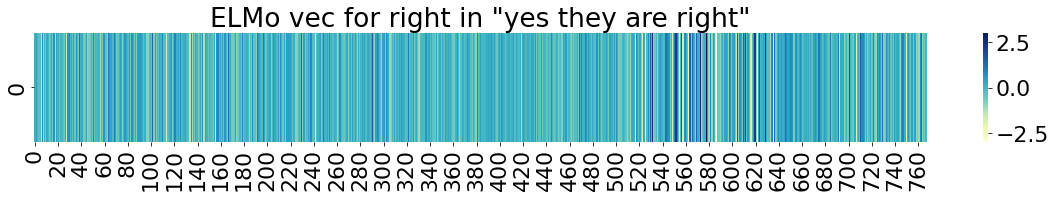

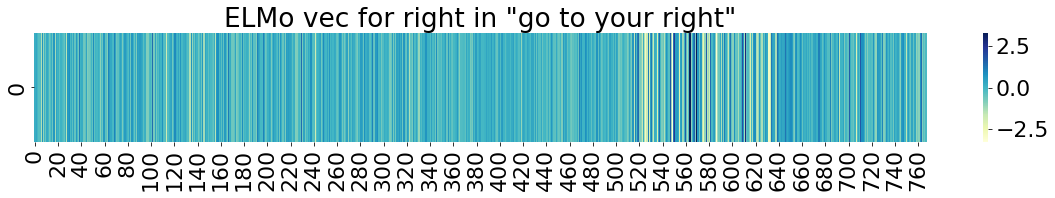

In [31]:
plot_1d_heatmap(right1, name="ELMo vec for right in \"yes they are right\"")

plot_1d_heatmap(right2, name="ELMo vec for right in \"go to your right\"")

In [32]:
 print("Simialrity between \"right\" from sentence 1 & 2:\t{}".
      format(similarity_between_docs(right1, right2, is_1d=True)))

# print("Simialrity between \"right\" from sentence 1 only:\t{}".
#       format(similarity_between_docs(right1, right1, is_1d=True)))

# print("Simialrity between \"right\" from sentence 2 only:\t{}".
#       format(similarity_between_docs(right2, right2, is_1d=True)))

Simialrity between "right" from sentence 1 & 2:	0.7283328771591187


In [33]:
print("Simialrity between \"right\" from sentence 1 only:\t{}".
      format(similarity_between_docs(right1, right1, is_1d=True)))



Simialrity between "right" from sentence 1 only:	0.9999998807907104


In [34]:
print("Simialrity between \"right\" from sentence 2 only:\t{}".
      format(similarity_between_docs(right2, right2, is_1d=True)))

Simialrity between "right" from sentence 2 only:	0.9999999403953552


## Google's BERT
Since `pymagnitude` doesn't have support for BERT yet, we'll use the [huggingface's](https://huggingface.co/) `transfomers` library for this.

In [35]:
import torch
import transformers


In [36]:
# dowonload the pre-trained bert weights and tokenizer
# this may take a while for first time
model_class, tokenizer_class, pretrained_weights = (transformers.BertModel, 
                                                    transformers.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
# tokenize a sentence and encode it into token_ids
tokenized1 = tokenizer.encode("yes they are right", add_special_tokens=False)
tokenized2 = tokenizer.encode("go to your right", add_special_tokens=False)
print(tokenized1, tokenized2)

# you can also get the full sentence using the token_ids
print(tokenizer.decode(tokenized1))
print(tokenizer.decode(tokenized2))

[2748, 2027, 2024, 2157] [2175, 2000, 2115, 2157]
yes they are right
go to your right


In [38]:
input_ids = torch.tensor([tokenized1, tokenized2])
model.eval()
with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs[0]

In [39]:
right1_bert = (last_hidden_states[0][-1]).numpy()
right2_bert = (last_hidden_states[1][-1]).numpy()

In [40]:
print(right1_bert.shape, right2_bert.shape)

(768,) (768,)


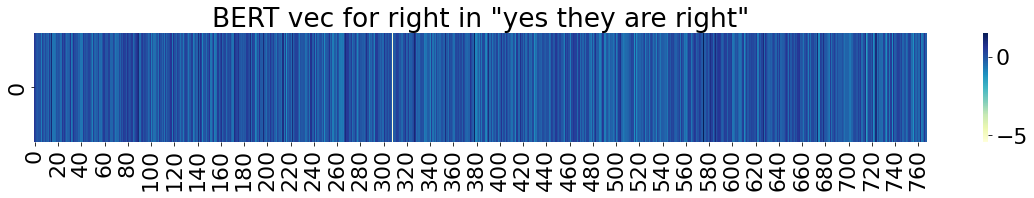

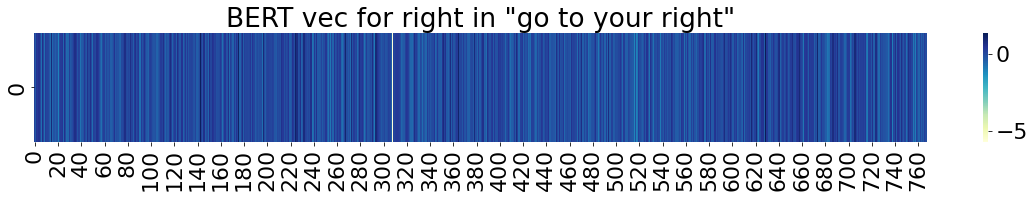

In [41]:
plot_1d_heatmap(right1_bert, name="BERT vec for right in \"yes they are right\"")
plot_1d_heatmap(right2_bert, name="BERT vec for right in \"go to your right\"")

In [42]:
print("Simialrity between \"right\" from sentence 1 & 2 using BERT:\t{}".
          format(similarity_between_docs(right1_bert, right2_bert, is_1d=True)))


Simialrity between "right" from sentence 1 & 2 using BERT:	0.6054781675338745


In [43]:
print("Simialrity between \"right\" from sentence 1 only using BERT:\t{}".
          format(similarity_between_docs(right1_bert, right1_bert, is_1d=True)))

Simialrity between "right" from sentence 1 only using BERT:	0.9999998211860657


In [44]:

print("Simialrity between \"right\" from sentence 2 only using BERT:\t{}".
          format(similarity_between_docs(right2_bert, right2_bert, is_1d=True)))

Simialrity between "right" from sentence 2 only using BERT:	0.9999998807907104


# Part B - Document Ranking

# Document Ranking
Let's use these embeddings to retrieve the documents based on a query

## Load the data

In [45]:
# Download the datasets from GitHub

!mkdir data
!cd data && curl -O https://raw.githubusercontent.com/ashishu007/Word-Embeddings/master/data/abstracts.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  779k  100  779k    0     0  4900k      0 --:--:-- --:--:-- --:--:-- 4900k


In [46]:
dfa = pd.read_csv('./data/abstracts.csv')
print(dfa.shape)
dfa = dfa[:50]
dfa.head(5)

(792, 2)


,title,content
0,Understanding Human Language: Can NLP and Deep...,There is a lot of overlap between the core pro...
1,Big Data in Climate: Opportunities and Challen...,This talk will present an overview of research...
2,A Sequential Decision Formulation of the Inter...,The Interface Card model is a promising new th...
3,Audio Features Affected by Music Expressivenes...,Within a Music Information Retrieval perspecti...
4,Automatic Identification and Contextual Reform...,Web search functionality is increasingly integ...


## Some utility functions

In [47]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [48]:
torch.__version__

'1.9.0+cu111'

In [49]:
# Utility function to generate word2vec embeddings for given sentence as a string

def gen_w2v_embs(row):
    # row = row['text']
    # print(row)
    
    tokens = nltk.word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    # print(token_words)
    
    stemming = PorterStemmer()
    tokens_stemmed = [stemming.stem(word) for word in token_words]
    # print(tokens_stemmed)
    
    # stops = set(stopwords.words("english"))
    stops = ["a", "an", "the"]
    meaningful_words = [w for w in tokens_stemmed if not w in stops]
    # print(meaningful_words)
    
    vecs = []
    for w in meaningful_words:
        w_vec = w2v_vectors.query(w)
        vecs.append(w_vec)
    vec_arr = np.array(vecs)
    vec_final = np.mean(vec_arr, axis=0, dtype="float32")

    return vec_final

In [50]:
# Utility function to generate bert embeddings for each row in a pandas column. 
# Here we use a different library called `sentence_transformers` beacuse this 
# library is easier than `transformers` for sentence embeddings

def gen_bert_embs(col):
    bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    bert_embs = bert_model.encode(col)
    return bert_embs

## Embedding the documents with different algorithms

In [51]:
w2v_abs = dfa["content"].apply(gen_w2v_embs)
w2v_abs = (torch.tensor(w2v_abs)).numpy()

In [52]:
elmo_abs = dfa["content"].apply((lambda x: elmo_vecs.query(x)))
elmo_abs = (torch.tensor(elmo_abs)).numpy()

/usr/local/lib/python3.7/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))


In [53]:
# This might take a while

bert_abs = gen_bert_embs(dfa["content"])

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

the below are numpy arrays 

In [54]:
w2v_abs.shape, elmo_abs.shape, bert_abs.shape

((50, 300), (50, 768), (50, 768))

In [55]:
type(w2v_abs.shape)

tuple

In [56]:
type(w2v_abs), type(elmo_abs), type(bert_abs)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

## Perform natural language queries

In [57]:
def gen_query_emb(q, emb="w2v"):
    if emb == "w2v":
        query_emb = gen_w2v_embs(q)
    elif emb == "elmo":
        query_emb = elmo_vecs.query(q)
    elif emb == "bert":
        query_bert = gen_bert_embs(q)
        query_emb = query_bert.reshape(-1)
    return query_emb

In [58]:
# embed the query

q1 = gen_query_emb("documents that discuss learning methods", emb="elmo")
q2 = gen_query_emb("documents that discuss learning methods", emb="bert")
q3 = gen_query_emb("documents that discuss learning methods", emb="w2v")

/usr/local/lib/python3.7/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))


In [59]:
q1.shape, q2.shape, q3.shape

((768,), (768,), (300,))

## Get the similarity between query and documents

In [60]:
def get_doc_similarity(q, docs):
    sims = {}
    for i, doc in enumerate(docs):
        sim_score = similarity_between_docs(q, doc, is_1d=True)
        sims[i] = sim_score
    sims_sorted = {k: v for k, v in sorted(sims.items(), key=lambda item: item[1], reverse=True)}
    return sims_sorted

In [61]:
s = get_doc_similarity(q2, bert_abs)


In [ ]:
s

In [62]:
ss = list(s.keys())[:10]
ss

[17, 0, 34, 23, 8, 15, 2, 13, 11, 12]

In [64]:
dfa["content"][17]

'Doc2Sent2Vec is an unsupervised approach to learn low-dimensional feature vector (or embedding) for a document. This embedding captures the semantics of the document and can be fed as input to machine learning algorithms to solve a myriad number of applications in the field of data mining and information retrieval. Some of these applications include document classification, retrieval, and ranking.'

### Exercises

In [ ]:
"""
Try ranking same documents using another natural language query and ranking algorithm
"""

# Your code here

'\nTry ranking same documents using another natural language query and ranking algorithm\n'

In [ ]:
"""
Print top 3 documents ranked by each query and algorithm. Compare their results
"""

# Your code here

'\nPrint top 3 documents ranked by each query and algorithm. Compare their results\n'

In [ ]:
"""
Plot the heatmap for a sentence using BERT and ELMo
Hint: look above for how queries are embedded (a query can be considered as a sentence too)
"""

# Your code here

'\nPlot the heatmap for a sentence using BERT and ELMo\nHint: look above for how queries are embedded (a query can be considered as a sentence too)\n'

In [ ]:
"""
Plot the heatmap for same sentence using Word2Vec
"""

# Your code here

'\nPlot the heatmap for same sentence using Word2Vec\n'

# Part C: Text Classification 


# Text Classification 
Let's apply different embeddings for a simple **Text Classification** problem

## Load the data

In [ ]:
from datasets import load_dataset

In [ ]:
!ls
!echo "before curl"
!cd data && ls
!cd data/ && curl -O https://raw.githubusercontent.com/ashishu007/Word-Embeddings/master/data/imdb_200.csv
!cd data && ls
!echo "after curl"

data  sample_data  vectors
before curl
abstracts.csv  imdb_2k.csv
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  266k  100  266k    0     0  1314k      0 --:--:-- --:--:-- --:--:-- 1320k
abstracts.csv  imdb_200.csv  imdb_2k.csv
after curl


In [ ]:
df = pd.read_csv('./data/imdb_200.csv')
print(df.shape)
df.head(5)

(200, 2)


,text,label
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


## Embedding the data using Word2Vec

In [ ]:
w2vs = df["text"].apply(gen_w2v_embs)

In [ ]:
w2v_embs = (torch.tensor(w2vs)).numpy()
w2v_embs.shape

(200, 300)

## Embedding the data using ELMo

In [ ]:
elmos = df["text"].apply((lambda x: elmo_vecs.query(x)))

/usr/local/lib/python3.7/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))


In [ ]:
elmo_embs = (torch.tensor(elmos)).numpy()
elmo_embs.shape

(200, 768)

## Embedding the data using BERT

In [ ]:
bert_embs = gen_bert_embs(df["text"])

In [ ]:
bert_embs.shape

(200, 768)

## Prepare the `features` and `labels` for train and test

In [ ]:
labels = df["label"]

In [ ]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(w2v_embs, labels, 
                                                                            test_size=0.33, 
                                                                            random_state=42, stratify=labels)
X_train_elmo, X_test_elmo, y_train_elmo, y_test_elmo = train_test_split(elmo_embs, labels, 
                                                                        test_size=0.33, 
                                                                        random_state=42, stratify=labels)
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(bert_embs, labels, 
                                                                        test_size=0.33, 
                                                                        random_state=42, stratify=labels)

In [ ]:
# train a LogisiticRegression model on train data

from sklearn.linear_model import LogisticRegression

lr_clf_w2v = LogisticRegression()
lr_clf_w2v.fit(X_train_w2v, y_train_w2v)

lr_clf_elmo = LogisticRegression()
lr_clf_elmo.fit(X_train_elmo, y_train_elmo)

lr_clf_bert = LogisticRegression()
lr_clf_bert.fit(X_train_bert, y_train_bert)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_w2v = lr_clf_w2v.predict(X_test_w2v)
y_pred_elmo = lr_clf_elmo.predict(X_test_elmo)
y_pred_bert = lr_clf_bert.predict(X_test_bert)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Word2Vec\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_w2v, y_test_w2v), 
                                                 f1_score(y_pred_w2v, y_test_w2v, average="macro")))
print("ELMo\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_elmo, y_test_elmo), 
                                                f1_score(y_pred_elmo, y_test_elmo, average="macro")))
print("BERT\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_bert, y_test_bert), 
                                                f1_score(y_pred_bert, y_test_bert, average="macro")))

Word2Vec	Accuracy: 0.6212121212121212	Macro F1: 0.6204278812974466
ELMo	Accuracy: 0.4696969696969697	Macro F1: 0.46663588085892405
BERT	Accuracy: 0.7878787878787878	Macro F1: 0.7861111111111112
